In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('aggregated_evaluations.csv')

# Define the documentation models and the evaluators used to score them
models = ['qwen2.5-coder:32b', 'codellama:70b', 'deepseek-coder:33b', 'codegemma:7b', 'codestral']
evaluators = ['Anthropic', 'DeepSeek', 'Gemini', 'GPT4o']

In [10]:
###############################################
# Generate and Rank Summary Table of Averages #
###############################################

# Create a list to hold summary records for each model
summary_records = []

# Loop through each model and compute the mean scores per evaluator,
# then compute an overall average score (by averaging evaluator means).
for model in models:
    evaluator_scores = {}
    for evaluator in evaluators:
        col_name = f'{model}_{evaluator}_score'
        if col_name in df.columns:
            evaluator_scores[evaluator] = df[col_name].mean()
    # Compute the overall average score for this model
    overall_avg = np.mean(list(evaluator_scores.values()))
    # Build the record with model name, overall average, and evaluator averages
    record = {"Model": model, "Overall": overall_avg, **evaluator_scores}
    summary_records.append(record)

# Create a DataFrame from the summary records
summary_df = pd.DataFrame(summary_records)

# Rank the models by Overall average score (highest first)
summary_df.sort_values("Overall", ascending=False, inplace=True)
summary_df.reset_index(drop=True, inplace=True)
summary_df.insert(0, 'Rank', range(1, len(summary_df) + 1))

###############################################
# Enhance Table Display with Pandas Styling   #
###############################################

# Format numerical columns to two decimal places and apply a background gradient
# to the 'Overall' column for a visual indication of performance.
styled_table = (summary_df.style
                .format({
                    'Overall': "{:.2f}",
                    'Anthropic': "{:.2f}",
                    'DeepSeek': "{:.2f}",
                    'Gemini': "{:.2f}",
                    'GPT4o': "{:.2f}"
                })
                .background_gradient(cmap='viridis', subset=['Overall'])
                .set_caption("Summary of Average Evaluation Scores per Model (Ranked by Overall Average)")
                )

# Display the styled table in a Jupyter Notebook or HTML renderer
display(styled_table)


,Rank,Model,Overall,Anthropic,DeepSeek,Gemini,GPT4o
0,1,qwen2.5-coder:32b,11.95,11.99,12.03,12.35,11.43
1,2,codestral,11.19,11.43,10.73,12.02,10.56
2,3,deepseek-coder:33b,10.40,10.42,9.86,11.34,9.98
3,4,codegemma:7b,8.62,8.31,7.91,9.59,8.67
4,5,codellama:70b,2.64,2.30,2.04,3.63,2.59


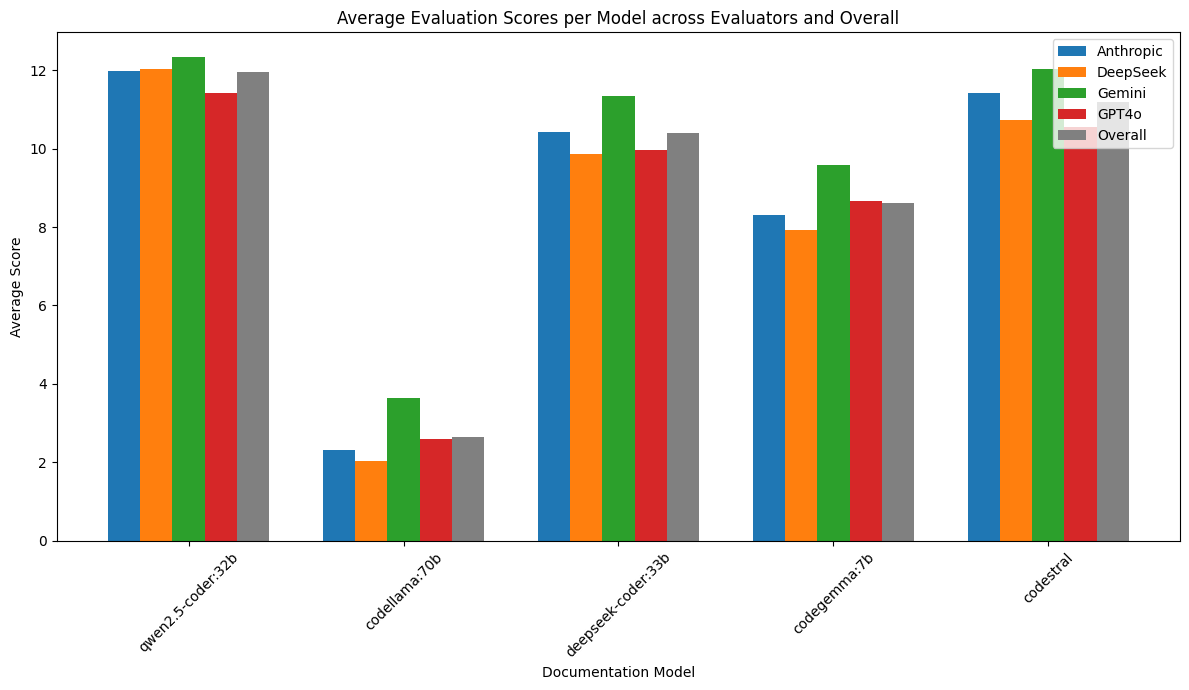

In [5]:
####################################################
# Part 2: Visualization - Grouped Bar Chart        #
# Display evaluator average scores with overall    #
####################################################

labels = summary_df['Model']
x = np.arange(len(labels))
width = 0.15  # Width for each bar

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each evaluator's average score
for idx, evaluator in enumerate(evaluators):
    ax.bar(x + idx * width, summary_df[evaluator], width, label=evaluator)

# Add an extra bar for the overall average scores
ax.bar(x + len(evaluators) * width, summary_df['Overall'], width, label='Overall', color='grey')

# Set labels and titles for clarity
ax.set_xlabel('Documentation Model')
ax.set_ylabel('Average Score')
ax.set_title('Average Evaluation Scores per Model across Evaluators and Overall')
ax.set_xticks(x + width * len(evaluators) / 2)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


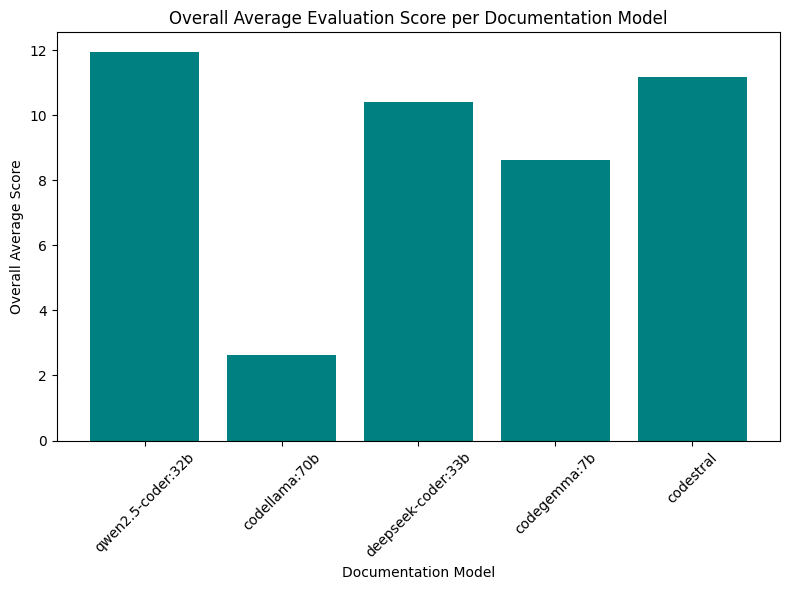

In [6]:
###################################################
# Part 3: Visualization - Overall Average Bar Chart#
###################################################

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, summary_df['Overall'], color='teal')
ax.set_title('Overall Average Evaluation Score per Documentation Model')
ax.set_xlabel('Documentation Model')
ax.set_ylabel('Overall Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

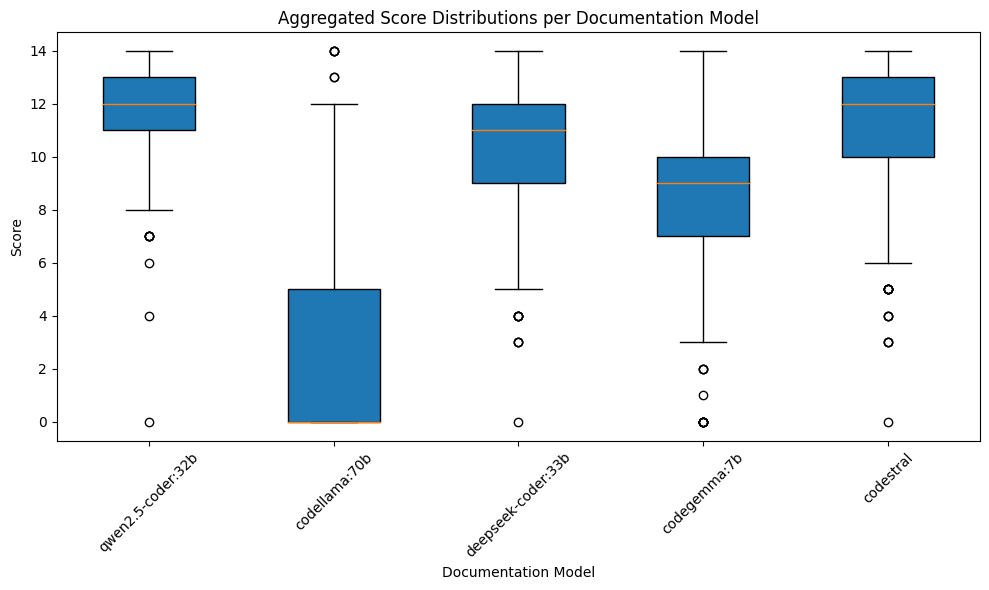

In [11]:
###############################################
# Part 4: Visualization - Box Plots for Score Distributions by Documentation Model
# This shows the aggregated score distribution (across all evaluators)
# for each documentation model.
###############################################

# Create lists to hold the aggregated score data and labels for the box plot
aggregated_scores = []  # Each element will be a Series of scores for one model
model_labels = []       # Names for each box plot

# Loop over each documentation model
for model in models:
    # For each evaluator, gather the score column if it exists
    score_columns = [f'{model}_{evaluator}_score' for evaluator in evaluators if f'{model}_{evaluator}_score' in df.columns]
    # Combine all scores across evaluators for the current model into one series
    # (Concatenate the series and drop NA values)
    if score_columns:
        scores = pd.concat([df[col].dropna() for col in score_columns])
        aggregated_scores.append(scores)
        model_labels.append(model)

# Plot box plots for each model's aggregated score distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(aggregated_scores, labels=model_labels, patch_artist=True)
ax.set_title('Aggregated Score Distributions per Documentation Model')
ax.set_xlabel('Documentation Model')
ax.set_ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
